In [5]:
import os
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_xgb_cv_predict,plot_roc,my_xgb_fit_predict

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

### Load train and test data

In [6]:
X_train,y_train,X_test,y_test=load_data(hla_representation='simple',
                                        species_representation='simple',
                                        seq_representation='simple')

Reading from file...
Creating representation...
Using  137654  training data points
Using  27680  testing data points
Done, It took: 3.45406913757 s


----


### Cross Validate on training data


In [3]:
#model params
params = {'max_depth':9,
         'eta':0.05,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "binary:logistic",
         'eval_metric': 'auc',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,X_train,y_train,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.786508	eval-auc:0.762631
[500]	train-auc:0.976025	eval-auc:0.915916
[1000]	train-auc:0.990329	eval-auc:0.920223
[1500]	train-auc:0.995378	eval-auc:0.921641
[2000]	train-auc:0.997533	eval-auc:0.921870
Stopping. Best iteration:
[2162]	train-auc:0.998022	eval-auc:0.922157

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.782607	eval-auc:0.768323
[500]	train-auc:0.976429	eval-auc:0.918104
[1000]	train-auc:0.990616	eval-auc:0.923682
[1500]	train-auc:0.995466	eval-auc:0.924349
[2000]	train-auc:0.997801	eval-auc:0.924478
Stopping. Best iteration:
[1817]	train-auc:0.997171	eval-auc:0.924716

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.793649	eval-auc:0.775350
[500]	train-auc:0.976642	eval-auc:0.913395
[1000]	train-auc:0.990278	eval-auc:0.918657
[1500]	train-auc:0.995085	eval-auc:0.919809
[2000]	train-auc:0.997506	eval-auc:0.920345
Stopping. Best iteration:
[208

----
### Evaluate


AUC: 0.921286595179


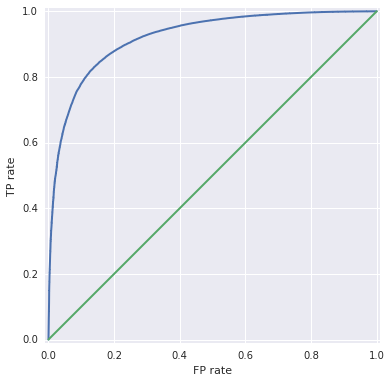

In [5]:
plot_roc(y_train,y_pred)

----
### Predict blind data

In [7]:
y_test_pred=my_xgb_fit_predict(params,X_train,y_train,X_test,
                       num_boost_round=5000,verbose_eval=500,
                       early_stopping_rounds=200,
                       validation_size=0.1)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.780738	eval-auc:0.771840
[500]	train-auc:0.973893	eval-auc:0.925581
[1000]	train-auc:0.988387	eval-auc:0.930703
[1500]	train-auc:0.994042	eval-auc:0.932232
Stopping. Best iteration:
[1555]	train-auc:0.994434	eval-auc:0.932490



AUC: 0.904238301146


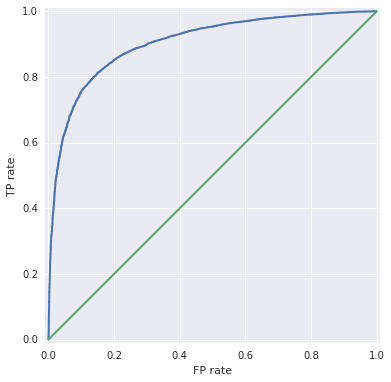

In [20]:
plot_roc(y_test,y_test_pred)

---

### Conclusion: passed 'state of the art'

Method | CV | Blind test
--- | --- | ---
SMMPMBEC | 0.8989 | 0.8474
NetMHC | 0.8930 | 0.8833
NetMHCpan |0.9176 | 0.8830
xgboost |**0.9212** | **0.9042**


---
